<a href="https://colab.research.google.com/github/Jpsama1236/Projects_JP/blob/main/JP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Uber Request Data.csv')

In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25


In [ ]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [ ]:
sum(df.duplicated(subset='Request id'))==0

True

In [ ]:
df.shape

(6745, 6)

In [ ]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [ ]:
df.isnull().sum()*100/df.shape[0]

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
df['Pickup point'].isnull().values.any()

False

In [ ]:
df['Pickup point'].isnull().values.sum()

0

In [ ]:
df['Request timestamp'].unique()

array(['11-07-2016 11:51', '11-07-2016 17:57', '12-07-2016 09:17', ...,
       '15-07-2016 23:52', '15-07-2016 23:54', '15-07-2016 23:55'],
      dtype=object)

In [ ]:
df['Request timestamp'].nunique()

4016

In [ ]:
df['Request timestamp']=pd.to_datetime(df['Request timestamp'],dayfirst=True)

In [ ]:
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'],dayfirst=True)

In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [ ]:
req_hour=df['Request timestamp'].dt.hour

In [ ]:
req_hour

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request timestamp, Length: 6745, dtype: int64

In [ ]:
df['req_hour']=req_hour

In [ ]:
req_day=df['Request timestamp'].dt.day

In [ ]:
df['req_day']=req_day

In [ ]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'req_hour', 'req_day'],
      dtype='object')

In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,13


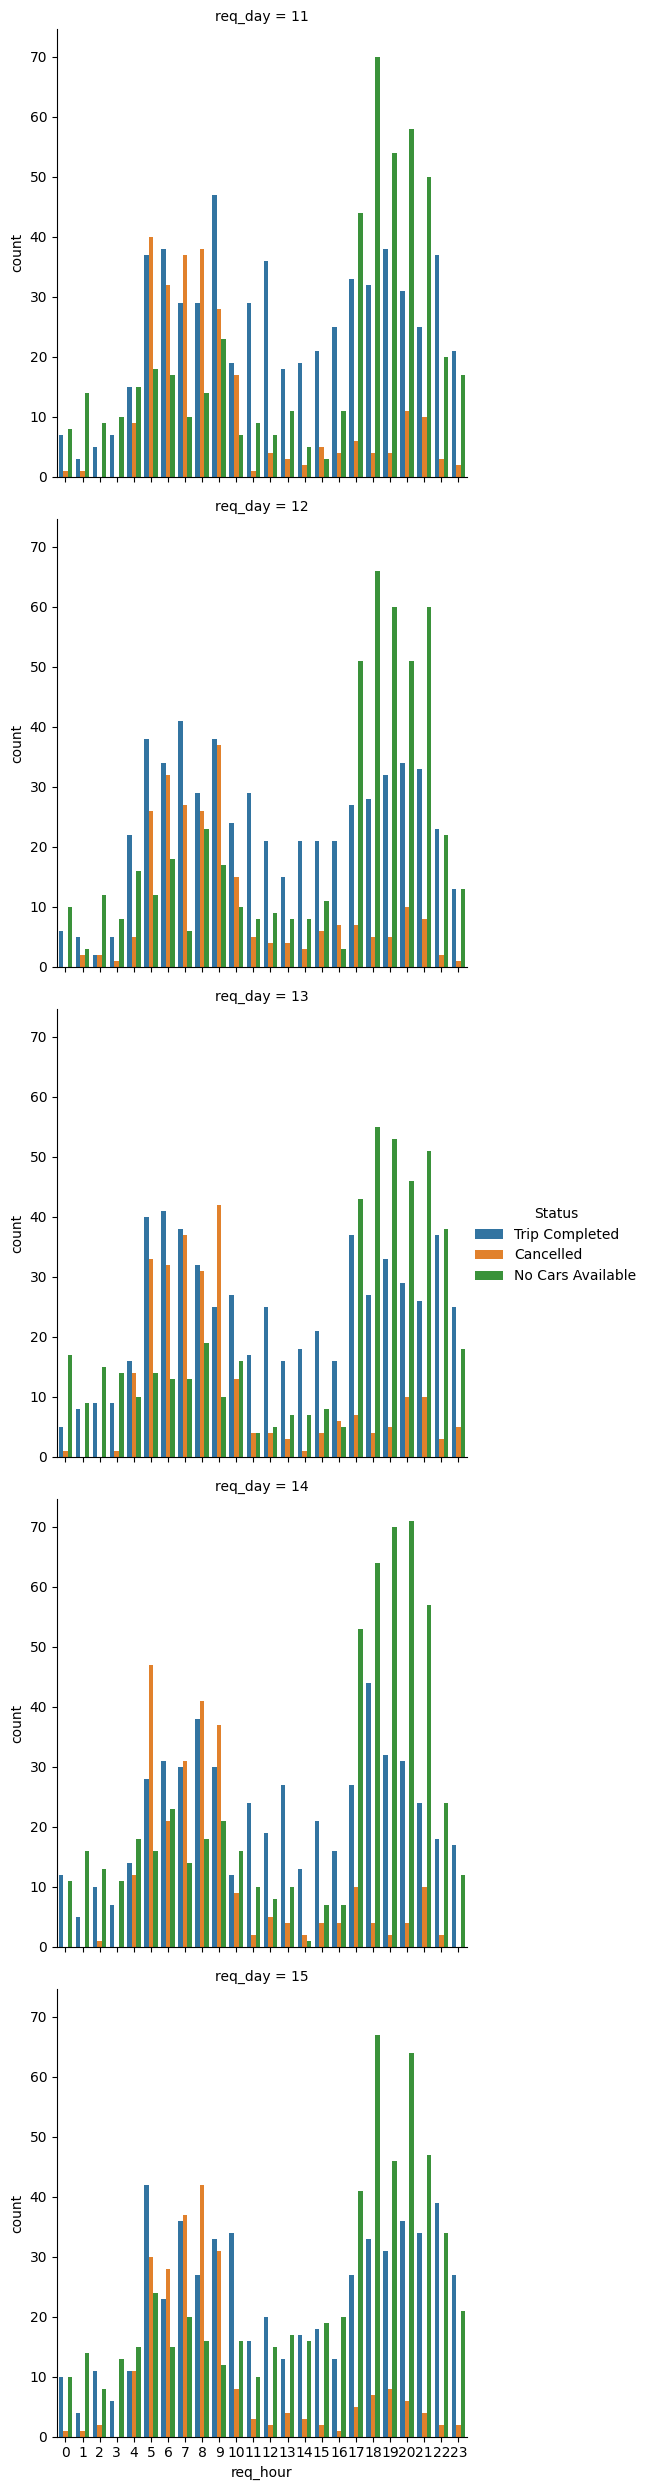

In [ ]:
sns.catplot(x='req_hour',row='req_day',data=df,hue='Status',kind='count')

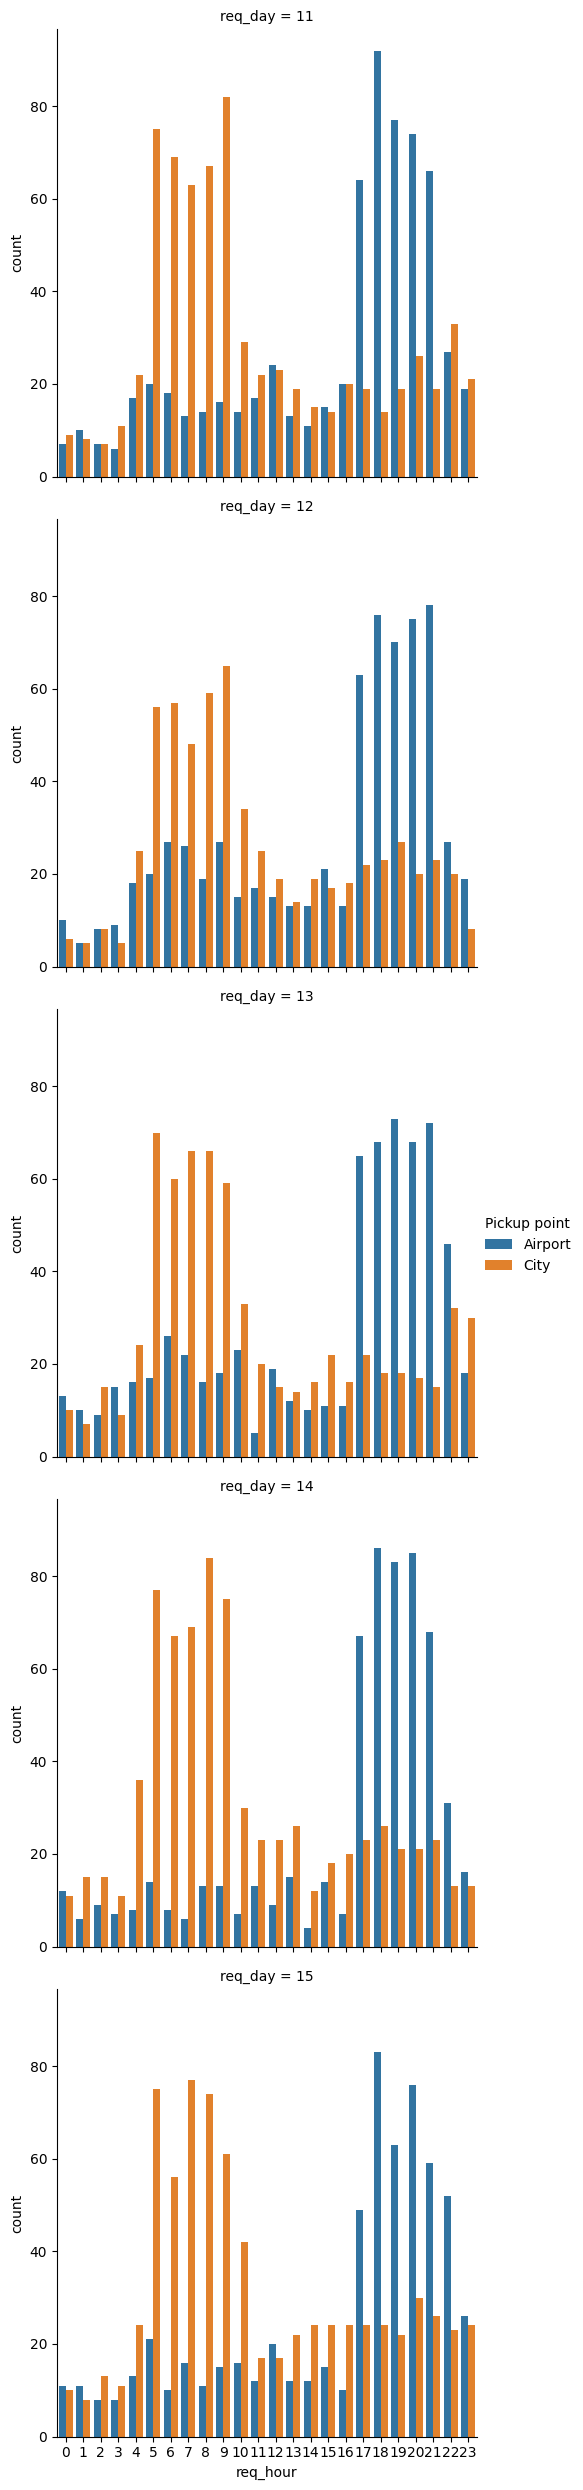

In [ ]:
sns.catplot(x='req_hour',row='req_day',data=df,hue='Pickup point',kind='count')

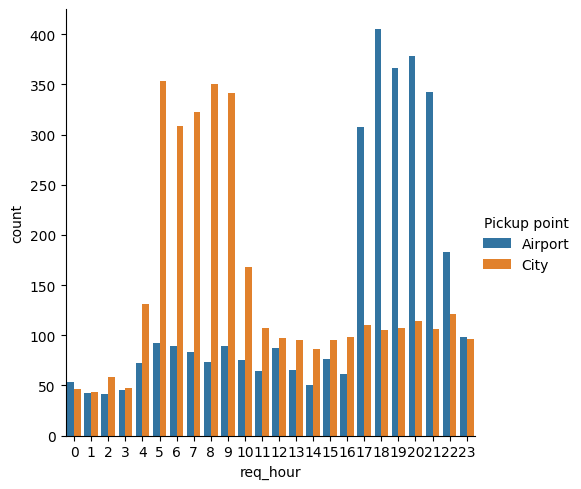

In [ ]:
sns.catplot(x='req_hour',hue='Pickup point',data=df,kind='count')

In [ ]:
def time_period(x):
  if x<5:
    return 'Pre-morning'
  elif 5<=x<10:
    return 'morning_rush'
  elif 10<=x<17:
    return 'afternoon'
  elif 17<=x<22 :
    return 'evning_rush'
  else:
    return 'Late night'
df['time_slot']=df['req_hour'].apply(lambda x:time_period(x))

In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,afternoon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,evning_rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,morning_rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,evning_rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,13,morning_rush


In [ ]:
df['time_slot'].value_counts()

evning_rush     2342
morning_rush    2103
afternoon       1224
Pre-morning      578
Late night       498
Name: time_slot, dtype: int64

<Axes: xlabel='time_slot', ylabel='count'>

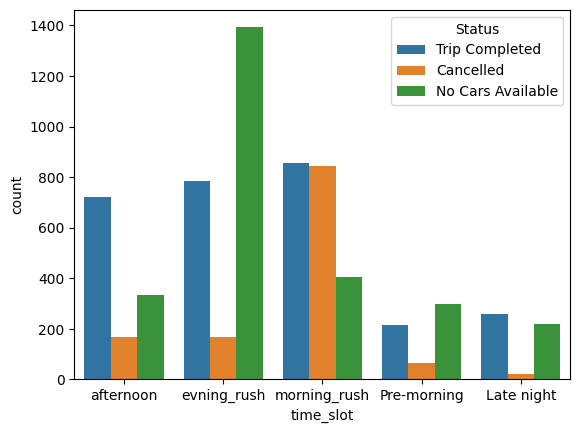

In [ ]:
sns.countplot(x='time_slot',hue='Status',data=df)

<Axes: xlabel='Pickup point', ylabel='count'>

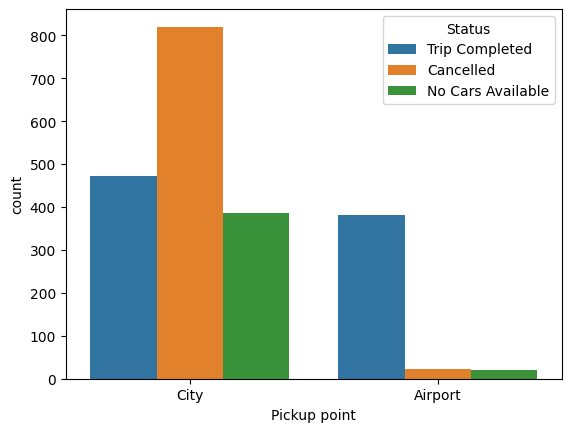

In [ ]:
df_morning_rush=df[df.time_slot=='morning_rush']
sns.countplot(x='Pickup point',hue='Status',data=df_morning_rush)

In [ ]:
airport_cancelled= df_morning_rush.loc[(df_morning_rush['Pickup point'] == 'City') & (df_morning_rush['Status']== "Cancelled")]
len(airport_cancelled.index)

820

<Axes: xlabel='Pickup point', ylabel='count'>

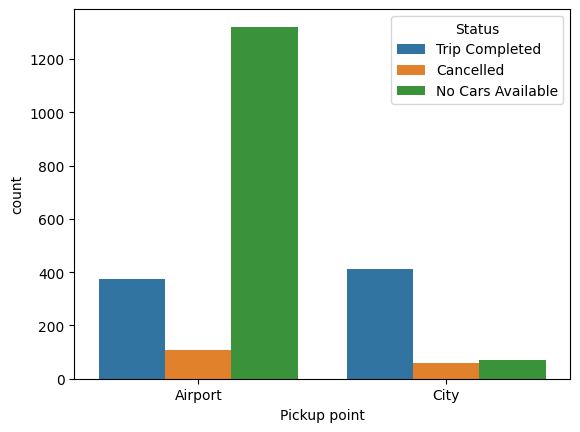

In [ ]:
df_evening=df[df.time_slot=='evning_rush']
sns.countplot(x='Pickup point',hue='Status',data=df_evening)

In [ ]:
def pie_chart(dataframe):
  labels=dataframe.index.values
  sizes=dataframe['Status'].values
  fig1,ax1=plt.subplots()
  ax1.pie(sizes,labels=labels,autopct='%1.1f%%',shadow= True, startangle= 180)
  ax1.axis('equal') # Piechart is drwan as circle
  plt.show()

In [ ]:
df_city=df.loc[(df['Pickup point']=='City') & (df['time_slot']=='morning_rush')]
df_city_count=pd.DataFrame(df_city.Status.value_counts())

In [ ]:
df_city_count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


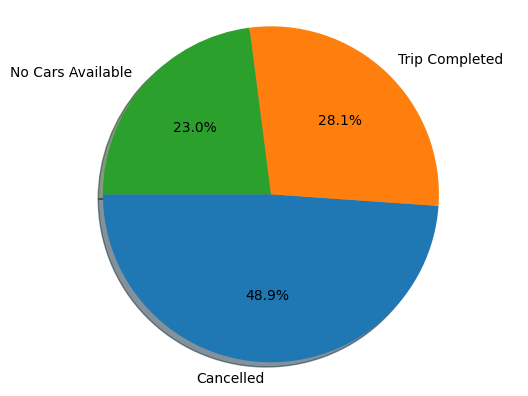

In [ ]:
pie_chart(df_city_count)

In [ ]:
df_airport=df.loc[(df['Pickup point']=='Airport') & (df['time_slot']=='evning_rush')]
df_airport_count=pd.DataFrame(df_airport.Status.value_counts())

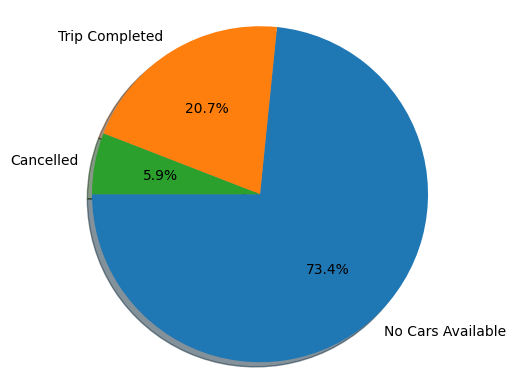

In [ ]:
pie_chart(df_airport_count)